# Regularizacion 

In [1]:
import pandas as pd
import numpy as np
import csv
import random as rnd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('regLinPoli.csv')

In [3]:
df.head()

,X,X2,X3,X4,y
0,7.317938,53.552216,1.683319,0.859736,20.716319
1,1.284357,1.649574,3.395139,0.959256,8.098008
2,97.740652,9553.235088,0.366480,-0.344100,5992.603427
3,17.753591,315.190006,-1.945300,-0.889370,199.959361
4,66.441081,4414.417290,0.504995,-0.450777,2384.624168


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['X', 'X2', 'X3', 'X4']],df[['y']], train_size=0.75)

In [5]:
X_scaler = preprocessing.StandardScaler().fit(X_train)
Y_scaler = preprocessing.StandardScaler().fit(Y_train)
X_scaler_p = preprocessing.StandardScaler().fit(X_test)
Y_scaler_p = preprocessing.StandardScaler().fit(Y_test)

In [6]:
Xscaler = X_scaler.transform(X_train)
Yscaler = Y_scaler.transform(Y_train)
Xscaler_p = X_scaler_p.transform(X_test)
Yscaler_p = Y_scaler_p.transform(Y_test)

In [7]:
Xscaler = pd.DataFrame(Xscaler)
Yscaler = pd.DataFrame(Yscaler)
Xscaler_p = pd.DataFrame(Xscaler_p)
Yscaler_p = pd.DataFrame(Yscaler_p)

In [8]:
linReg=LinearRegression()
linReg.fit(Xscaler, Yscaler)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
print linReg.intercept_,  linReg.coef_[0][0], linReg.coef_[0][1], linReg.coef_[0][2], linReg.coef_[0][3]

[ -1.64942081e-16] 0.0394803264156 0.950431020564 -0.00359911426329 -0.00790440018439


In [10]:
def salida (w0, W, X1):
    V_X = w0
    for k in range(len(W)):
        V_X = V_X + (W[k]* X1[k])
    return V_X

In [11]:
def entrena (w0, W, X, Y, nu, lam):
    for i in range (len(X)):
        X1 = X.iloc[i]
        sal = salida(w0, W, X1)
        error=Y.iloc[i] - sal
        w0 = w0 + (nu*error)
        for j in range(len(X1)):
            W[j] = W[j] + (nu*error*X.iloc[i][j]) - (lam*W[j])
    return w0,W

In [12]:
#Obtenemos la regresión regularizada 
w0 = float(np.random.randint(-5,5,1))
W = list(np.random.randint(-5,5,4))
nu = 0.01
lam = 0.05
print W

[1, 4, -4, 4]


In [13]:
prueba1= entrena(w0, W, Xscaler, Yscaler, nu, lam)
prueba1

(0    0.086498
 dtype: float64, [0    0.146868
  dtype: float64, 0    0.160612
  dtype: float64, 0    0.004189
  dtype: float64, 0    0.02751
  dtype: float64])

In [15]:
y_prueb=float(prueba1[0])+(Xscaler[0]*float(prueba1[1][0]))+(Xscaler[1]*float(prueba1[1][1]))+(Xscaler[2]*float(prueba1[1][2]))+(Xscaler[3]*float(prueba1[1][3]))
print y_prueb.head()

0   -0.244189
1   -0.314520
2   -0.141357
3    0.583323
4    0.708938
dtype: float64


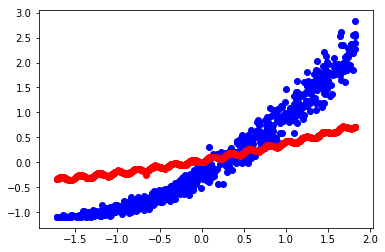

In [16]:
plt.scatter(Xscaler[0], Yscaler[0], color='blue')
plt.scatter(Xscaler[0], y_prueb, color='red', linewidth=1)
plt.show()